In [2]:
# Filter all warnings.
# A recent matplotlib update around October 2015 causes various 
# spurious warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import sklearn.preprocessing as skp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

# #1

## a.)

In [6]:
df = pd.read_csv('customer.csv')

df.shape

(20, 9)

In [5]:
df.head()

,CustomerID,Gender,Payment,FavoriteProduct,Age,Income,HouseholdSize,Sales,StoreVisit
0,121,Female,Cash,Beer,42,65000,4,20,1
1,123,Male,Cash,Spirit,60,45000,2,300,10
2,154,Male,Debit,Beer,21,21000,1,46,18
3,166,Male,Cash,Spirit,72,48000,2,290,11
4,170,Female,Credit,Wine,36,90000,5,190,4


## b.)

In [6]:
df_filtered = df[df['StoreVisit'] > 3]

## c.)

In [7]:
dfbinary = df_filtered.copy()

dfbinary["Male"] = 0
dfbinary["Female"] = 0
dfbinary["Debit"] = 0
dfbinary["Credit"] = 0
dfbinary["Cash"] = 0
dfbinary["Beer"] = 0
dfbinary["Wine"] = 0
dfbinary["Spirit"] = 0

dfbinary.loc[dfbinary['Gender'] == "Male",'Male'] = 1
dfbinary.loc[dfbinary['Gender'] == "Female",'Female'] = 1
dfbinary.loc[dfbinary['Payment'] == "Debit",'Debit'] = 1
dfbinary.loc[dfbinary['Payment'] == "Credit",'Credit'] = 1
dfbinary.loc[dfbinary['Payment'] == "Cash",'Cash'] = 1
dfbinary.loc[dfbinary['FavoriteProduct'] == "Beer",'Beer'] = 1
dfbinary.loc[dfbinary['FavoriteProduct'] == "Wine",'Wine'] = 1
dfbinary.loc[dfbinary['FavoriteProduct'] == "Spirit",'Spirit'] = 1

dfnewbinary = dfbinary.set_index("CustomerID") 
dfnewbinary = dfnewbinary.drop(dfnewbinary.columns[[0, 1, 2]], axis=1)

In [8]:
dfnewbinary

,Age,Income,HouseholdSize,Sales,StoreVisit,Male,Female,Debit,Credit,Cash,Beer,Wine,Spirit
CustomerID,,,,,,,,,,,,,
123,60,45000,2,300,10,1,0,0,0,1,0,0,1
154,21,21000,1,46,18,1,0,1,0,0,1,0,0
166,72,48000,2,290,11,1,0,0,0,1,0,0,1
170,36,90000,5,190,4,0,1,0,1,0,0,1,0
198,34,85000,4,180,6,0,1,1,0,0,0,1,0
222,21,21000,1,75,21,1,0,0,0,1,0,0,1
239,35,75000,4,200,5,0,1,0,1,0,0,0,1
268,68,44000,2,280,13,1,0,1,0,0,0,0,1
293,23,30000,1,60,22,1,0,1,0,0,1,0,0


## d.)

In [9]:
dfnorm = dfnewbinary.apply(lambda x: (x-x.mean())/x.std())





#Cluster 1 has four customers: 170, 198, 239, 384

#Cluster 2 has four customers: 123, 166, 268, 332

#Cluster 3 has seven customers: 154, 222, 293, 334, 334, 537, 584


In [10]:
dfnorm

,Age,Income,HouseholdSize,Sales,StoreVisit,Male,Female,Debit,Credit,Cash,Beer,Wine,Spirit
CustomerID,,,,,,,,,,,,,
123,1.206906,-0.090155,-0.284885,1.332523,-0.541655,0.903696,-0.903696,-0.68313,-0.483046,1.032796,-0.788811,-0.582575,1.36626
154,-0.845536,-0.827783,-0.997097,-1.063377,0.684734,0.903696,-0.903696,1.36626,-0.483046,-0.903696,1.183216,-0.582575,-0.68313
166,1.838427,0.002049,-0.284885,1.238196,-0.388356,0.903696,-0.903696,-0.68313,-0.483046,1.032796,-0.788811,-0.582575,1.36626
170,-0.056135,1.292898,1.851752,0.294928,-1.461446,-1.032796,1.032796,-0.68313,1.932184,-0.903696,-0.788811,1.602082,-0.68313
198,-0.161389,1.139226,1.139540,0.200602,-1.154849,-1.032796,1.032796,1.36626,-0.483046,-0.903696,-0.788811,1.602082,-0.68313
222,-0.845536,-0.827783,-0.997097,-0.789829,1.144629,0.903696,-0.903696,-0.68313,-0.483046,1.032796,-0.788811,-0.582575,1.36626
239,-0.108762,0.831881,1.139540,0.389255,-1.308148,-1.032796,1.032796,-0.68313,1.932184,-0.903696,-0.788811,-0.582575,1.36626
268,1.627920,-0.120889,-0.284885,1.143869,-0.081759,0.903696,-0.903696,1.36626,-0.483046,-0.903696,-0.788811,-0.582575,1.36626
293,-0.740283,-0.551172,-0.997097,-0.931319,1.297928,0.903696,-0.903696,1.36626,-0.483046,-0.903696,1.183216,-0.582575,-0.68313


## e.)

In [11]:
#STEP 1

dist = spd.squareform(spd.pdist(dfnorm, metric='euclidean'))
dist.shape

(15, 15)

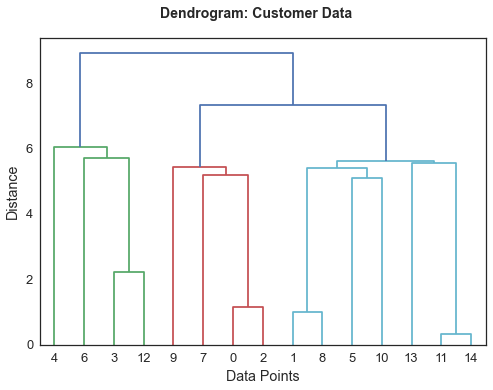

In [12]:
linkz = sph.linkage(dist, method='single')  # obtain the linkage matrix
plotz = sph.dendrogram(linkz)  # plot the linkage matrix as a dendrogram
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.suptitle('Dendrogram: Customer Data', 
             fontweight='bold', fontsize=14);

We choose 7 as the threshold because that is where the data forms/breaks in the dendrogram. Choosing a threshold of 7 gives us 3 clusters.

In [13]:
clusterlabels = sph.fcluster(linkz, 7, criterion='distance')
dfnorm['Cluster Label'] = clusterlabels
dfnorm

,Age,Income,HouseholdSize,Sales,StoreVisit,Male,Female,Debit,Credit,Cash,Beer,Wine,Spirit,Cluster Label
CustomerID,,,,,,,,,,,,,,
123,1.206906,-0.090155,-0.284885,1.332523,-0.541655,0.903696,-0.903696,-0.68313,-0.483046,1.032796,-0.788811,-0.582575,1.36626,2
154,-0.845536,-0.827783,-0.997097,-1.063377,0.684734,0.903696,-0.903696,1.36626,-0.483046,-0.903696,1.183216,-0.582575,-0.68313,3
166,1.838427,0.002049,-0.284885,1.238196,-0.388356,0.903696,-0.903696,-0.68313,-0.483046,1.032796,-0.788811,-0.582575,1.36626,2
170,-0.056135,1.292898,1.851752,0.294928,-1.461446,-1.032796,1.032796,-0.68313,1.932184,-0.903696,-0.788811,1.602082,-0.68313,1
198,-0.161389,1.139226,1.139540,0.200602,-1.154849,-1.032796,1.032796,1.36626,-0.483046,-0.903696,-0.788811,1.602082,-0.68313,1
222,-0.845536,-0.827783,-0.997097,-0.789829,1.144629,0.903696,-0.903696,-0.68313,-0.483046,1.032796,-0.788811,-0.582575,1.36626,3
239,-0.108762,0.831881,1.139540,0.389255,-1.308148,-1.032796,1.032796,-0.68313,1.932184,-0.903696,-0.788811,-0.582575,1.36626,1
268,1.627920,-0.120889,-0.284885,1.143869,-0.081759,0.903696,-0.903696,1.36626,-0.483046,-0.903696,-0.788811,-0.582575,1.36626,2
293,-0.740283,-0.551172,-0.997097,-0.931319,1.297928,0.903696,-0.903696,1.36626,-0.483046,-0.903696,1.183216,-0.582575,-0.68313,3


Cluster 1 has four customers: 170, 198, 239, 384

Cluster 2 has four customers: 123, 166, 268, 332

Cluster 3 has seven customers: 154, 222, 293, 334, 334, 537, 584

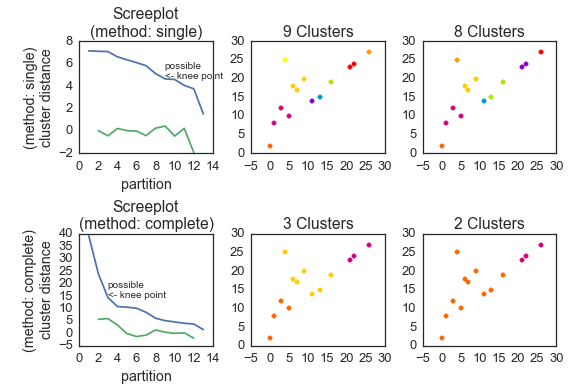

In [68]:
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

fig, axes23 = plt.subplots(2, 3)

for method, axes in zip(['single', 'complete'], axes23):
    z = hac.linkage(linkz, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(linkz[part == cluster, 0], linkz[part == cluster, 1], 
                       color=clr[cluster])

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()

#### Determining best k

In [131]:
kmeans_model = skc.KMeans(n_clusters=3, random_state=0).fit(dfnorm)

silh_score = skm.silhouette_score(dfnorm, kmeans_model.labels_)
silh_score  # the Silhouette coefficient

0.42105379580760283

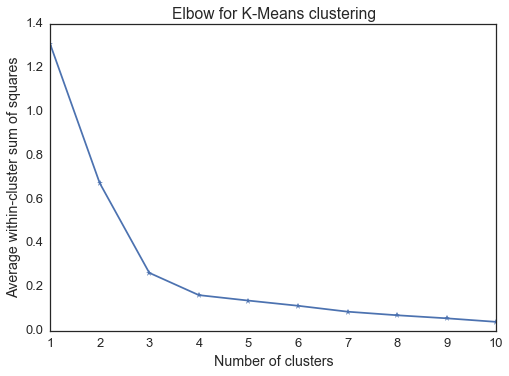

In [14]:
X = dfnorm.ix[:,:2]  # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');

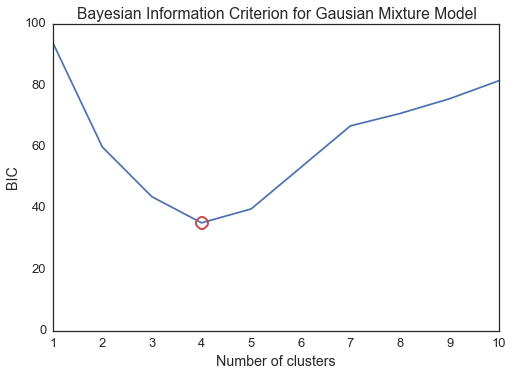

In [128]:
X = dfnorm.ix[:,:2]  # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
gmms = [skmix.GMM(k).fit(X) for k in K]
bics = [g.bic(X) for g in gmms]
plt.plot(K, bics)
kIdx = np.argmin(bics)  # <-- the selected index
plt.plot(K[kIdx], bics[kIdx], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.ylim(0,plt.ylim()[1])
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('Bayesian Information Criterion for Gausian Mixture Model')

According to Elbow and Silhouette methods, k = 3 is the best k-value.

## f.)

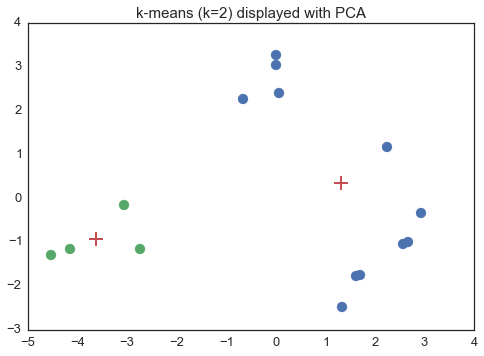

In [60]:
# PCA for dimensionality reduction
pca = skd.PCA(n_components=2)
traits_pca = pca.fit_transform(dfnorm)

# K-means
kmeans_model = skc.KMeans(2).fit(dfnorm)
centroids = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids)
cluster_labels = kmeans_model.labels_

# Plot the results on 2-D scatterplot with cluster centroids
plt.scatter(traits_pca[cluster_labels==0,0], 
            traits_pca[cluster_labels==0,1],
            s=100, color='b')
plt.scatter(traits_pca[cluster_labels==1,0], 
            traits_pca[cluster_labels==1,1],
            s=100, color='g')
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='+', s=200,
            linewidths=2, color='r')
plt.title('k-means (k=2) displayed with PCA', fontsize=15);

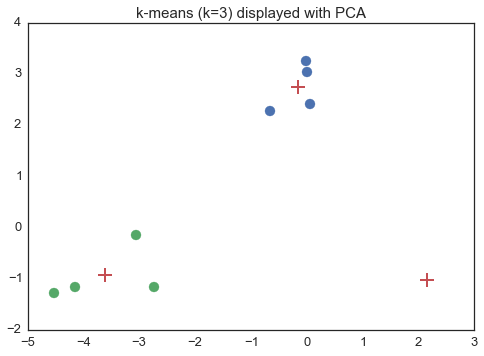

In [62]:
# PCA for dimensionality reduction
pca = skd.PCA(n_components=3)
traits_pca = pca.fit_transform(dfnorm)

# K-means
kmeans_model = skc.KMeans(3).fit(dfnorm)
centroids = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids)
cluster_labels = kmeans_model.labels_

# Plot the results on 2-D scatterplot with cluster centroids
plt.scatter(traits_pca[cluster_labels==0,0], 
            traits_pca[cluster_labels==0,1],
            s=100, color='b')
plt.scatter(traits_pca[cluster_labels==1,0], 
            traits_pca[cluster_labels==1,1],
            s=100, color='g')
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='+', s=200,
            linewidths=2, color='r')
plt.title('k-means (k=3) displayed with PCA', fontsize=15);

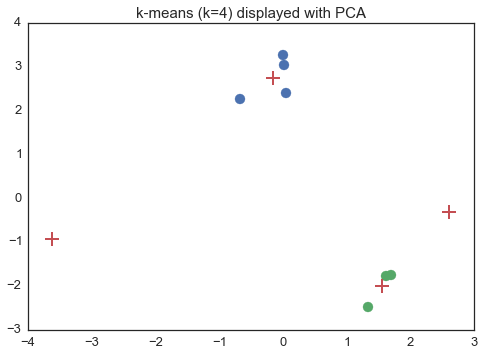

In [64]:
# PCA for dimensionality reduction
pca = skd.PCA(n_components=4)
traits_pca = pca.fit_transform(dfnorm)

# K-means
kmeans_model = skc.KMeans(4).fit(dfnorm)
centroids = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids)
cluster_labels = kmeans_model.labels_

# Plot the results on 2-D scatterplot with cluster centroids
plt.scatter(traits_pca[cluster_labels==0,0], 
            traits_pca[cluster_labels==0,1],
            s=100, color='b')
plt.scatter(traits_pca[cluster_labels==1,0], 
            traits_pca[cluster_labels==1,1],
            s=100, color='g')
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='+', s=200,
            linewidths=2, color='r')
plt.title('k-means (k=4) displayed with PCA', fontsize=15);

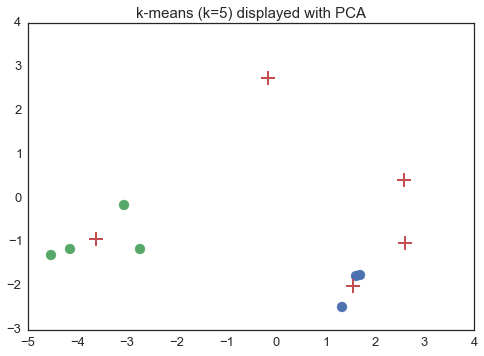

In [78]:
# PCA for dimensionality reduction
pca = skd.PCA(n_components=5)
traits_pca = pca.fit_transform(dfnorm)

# K-means
kmeans_model = skc.KMeans(5).fit(dfnorm)
centroids = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids)
cluster_labels = kmeans_model.labels_

# Plot the results on 2-D scatterplot with cluster centroids
plt.scatter(traits_pca[cluster_labels==0,0], 
            traits_pca[cluster_labels==0,1],
            s=100, color='b')
plt.scatter(traits_pca[cluster_labels==1,0], 
            traits_pca[cluster_labels==1,1],
            s=100, color='g')
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='+', s=200,
            linewidths=2, color='r')
plt.title('k-means (k=5) displayed with PCA', fontsize=15);

#### Determining best k

In [134]:
#k = 3 gives highest silhouette score

for k in range(2,6):
    kmeans_model = skc.KMeans(n_clusters=k, random_state=0).fit(dfnorm)
    score = skm.silhouette_score(dfnorm, 
                                             kmeans_model.labels_)
    print('k = %d, silhouette_score = %f'%(k, score))

k = 2, silhouette_score = 0.357656
k = 3, silhouette_score = 0.421054
k = 4, silhouette_score = 0.390000
k = 5, silhouette_score = 0.327421


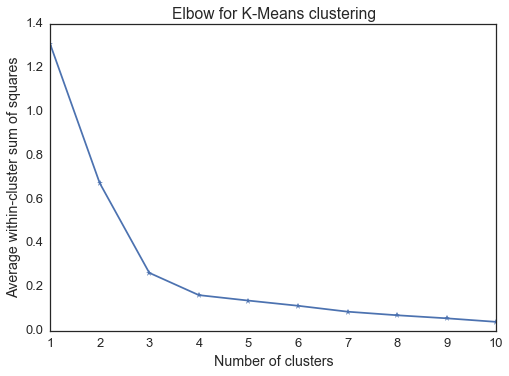

In [133]:
X = dfnorm.ix[:,:2]  # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');

## g.)

Cluster 1: 170, 198, 239, 384

Cluster 2: 123, 166, 268, 332

Cluster 3: 154, 222, 293, 334, 335, 537, 584

In [82]:
# K-means
kmeans_model = skc.KMeans(3).fit(dfnorm)
centroids = kmeans_model.cluster_centers_

ground_truth = [[170, 198, 239, 384],
                [123, 166, 268, 332],
                [154, 222, 293, 334, 335, 537, 584]]

df_truth = pd.DataFrame(
            [(x,i) for i,c in enumerate(ground_truth) for x in c], 
            columns=['CustomerID','GroundTruth'])
df_truth.set_index('CustomerID', inplace=True)
df_truth = df_truth.sort_index()
labels_truth = df_truth['GroundTruth']

labels_predicted = [2,1,2,0,0,1,0,2,1,2,1,1,0,1,1]

skm.adjusted_rand_score(labels_truth,labels_predicted)

1.0

In [84]:
print(skm.normalized_mutual_info_score(labels_truth,labels_predicted))

1.0


# #2

## a.)

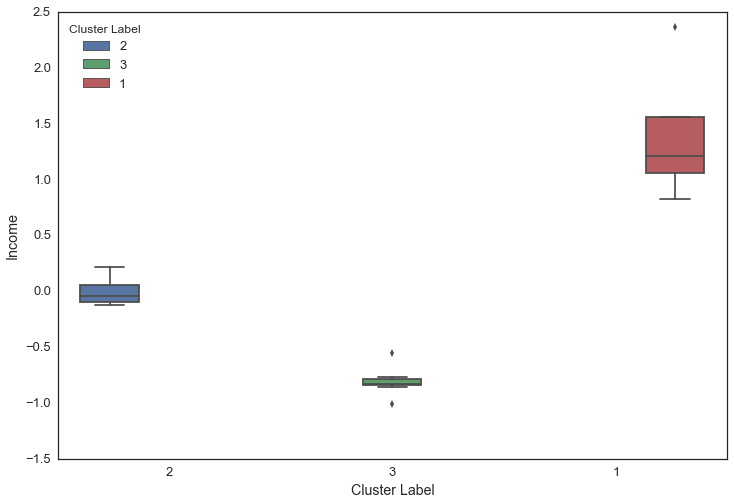

In [88]:
plt.figure(figsize=(12,8));
sns.boxplot(x='Cluster Label', y='Income', data=dfnorm, 
            hue='Cluster Label');

The boxplot located above shows the income distribution for each cluster. Cluster 1 has the biggest range of income. Clusters 3 and 2 are considerably more limited in comparison. We can see that clusters 1 and 3 have outliers.

In [1]:
sns.lmplot(x='Age', y='Sales', hue='Cluster Label', 
           data=dfnorm, fit_reg=True, x_jitter=.1);

NameError: name 'sns' is not defined

This scatterplot regression shows that with the exception of cluster 3, which appears to remain steady, sales drop as age increases. It is a negative slope. Which intuitively makes a bit of sense that people would drink less as they get older. We need more data points to make stronger regression inferences though.

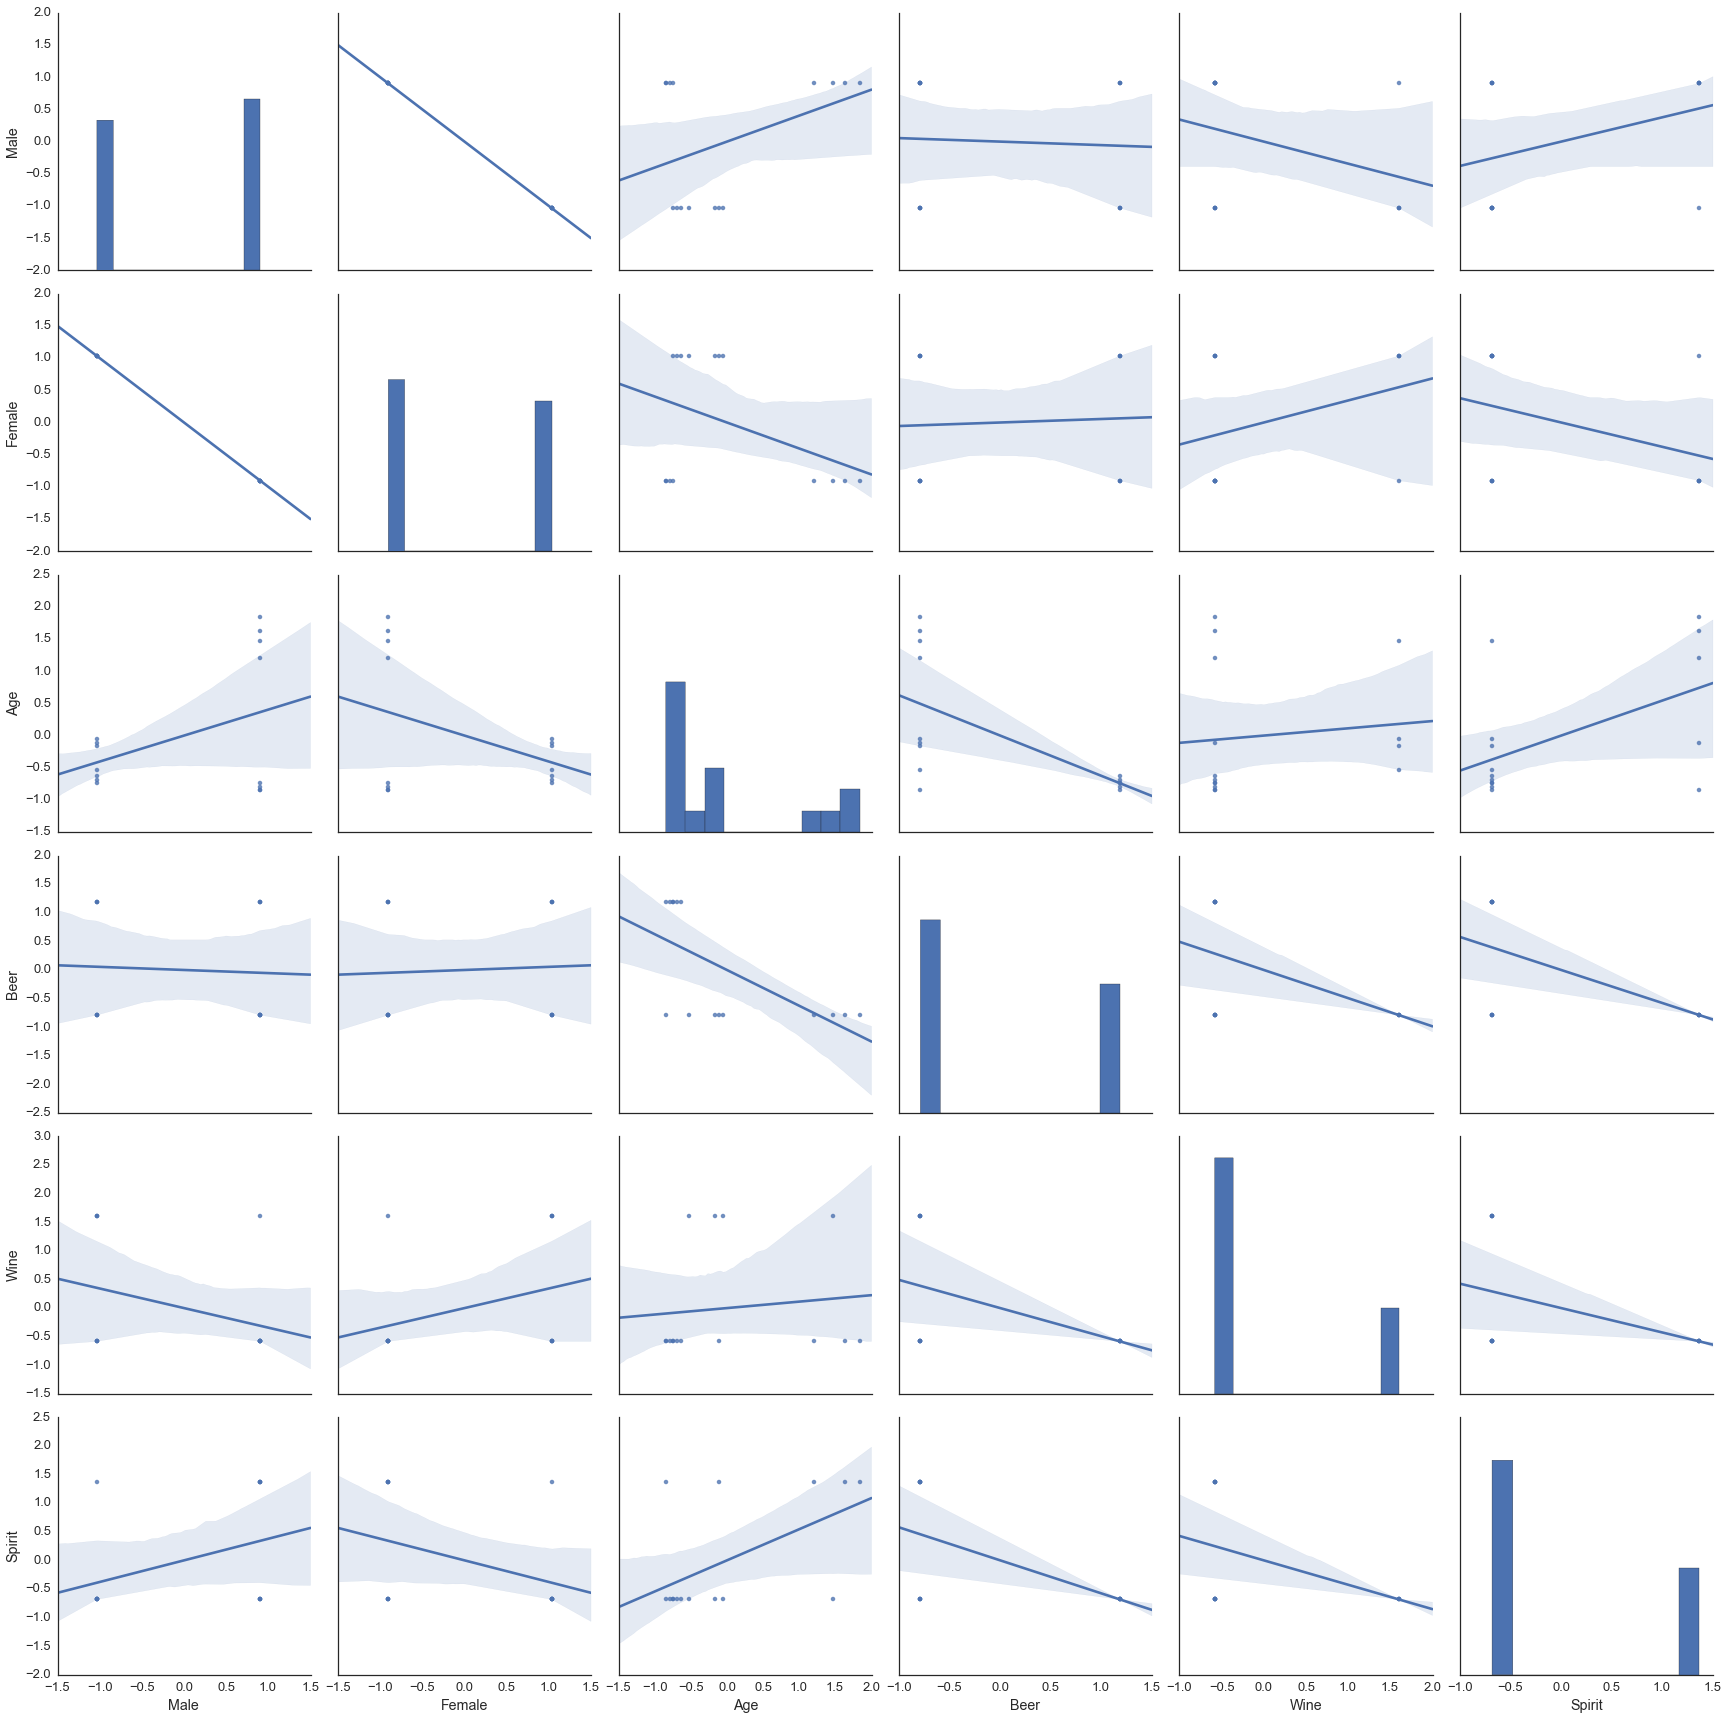

In [182]:
sns.pairplot(dfnorm, size = 4, kind="reg", vars=['Male','Female','Age','Beer','Wine','Spirit'])

In [167]:
clusteruno = dfnewbinary.groupby(dfnorm['Cluster Label']).mean()
clusteruno

,Age,Income,HouseholdSize,Sales,StoreVisit,Male,Female,Debit,Credit,Cash,Beer,Wine,Spirit
Cluster Label,,,,,,,,,,,,,
1,33.000000,93750.000000,4.500000,197.500000,5.000000,0.000000,1.000000,0.250000,0.75,0.000000,0.000000,0.75,0.250000
2,66.250000,48000.000000,2.000000,297.500000,11.500000,1.000000,0.000000,0.250000,0.00,0.750000,0.000000,0.25,0.750000
3,22.714286,21714.285714,1.428571,57.285714,19.571429,0.571429,0.428571,0.428571,0.00,0.571429,0.857143,0.00,0.142857


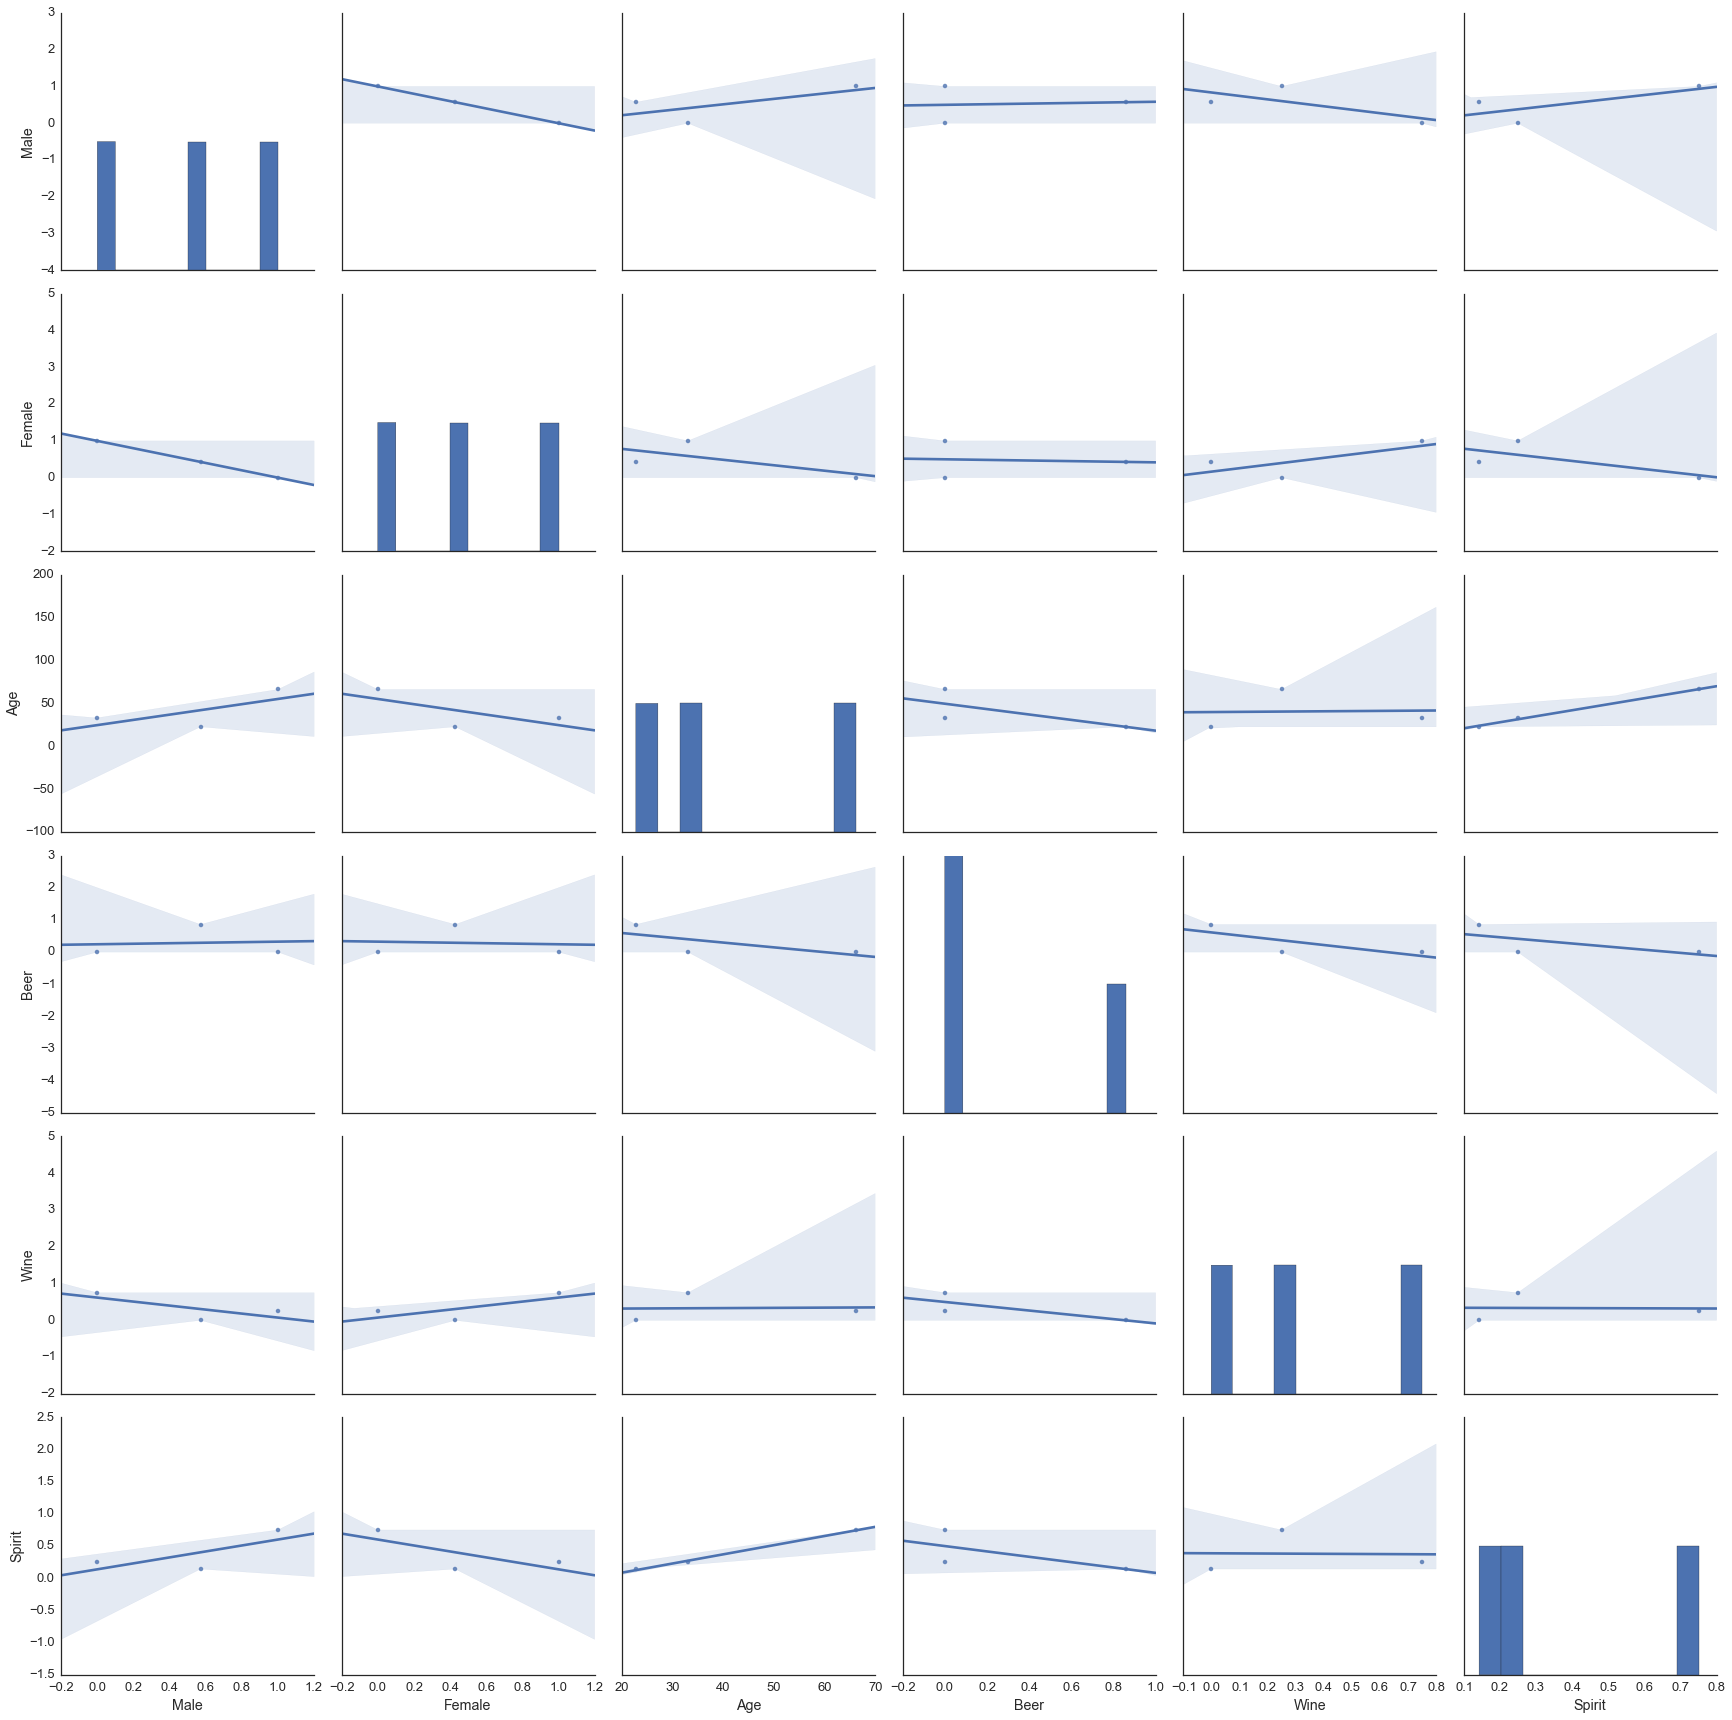

In [170]:
sns.pairplot(clusteruno, size = 4, kind="reg", vars=['Male','Female','Age','Beer','Wine','Spirit'])

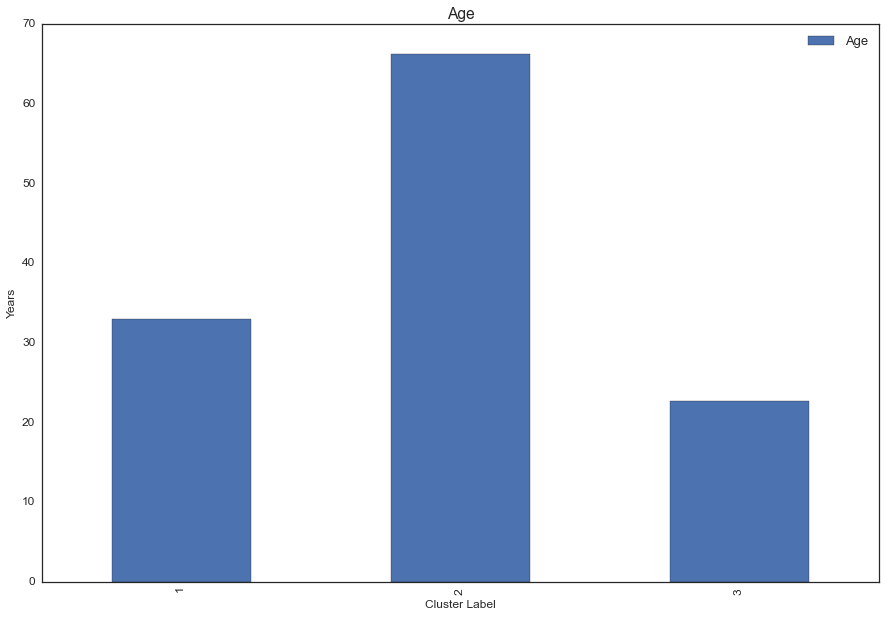

In [183]:
import matplotlib.pyplot as plt
ax = clusteruno[['Age']].plot(kind='bar', title ="Age",figsize=(15,10),
                legend=True, fontsize=12)
ax.set_xlabel("Cluster Label",fontsize=12)
ax.set_ylabel("Years",fontsize=12)
plt.show()

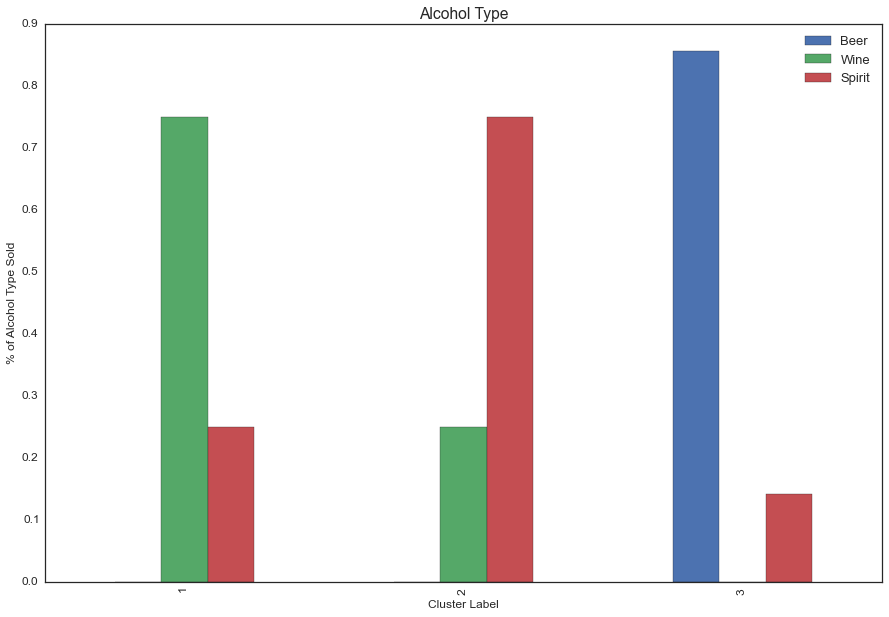

In [185]:
ax = clusteruno[['Beer','Wine','Spirit']].plot(kind='bar', title ="Alcohol Type",figsize=(15,10),
                legend=True, fontsize=12)
ax.set_xlabel("Cluster Label",fontsize=12)
ax.set_ylabel("% of Alcohol Type Sold",fontsize=12)
plt.show()

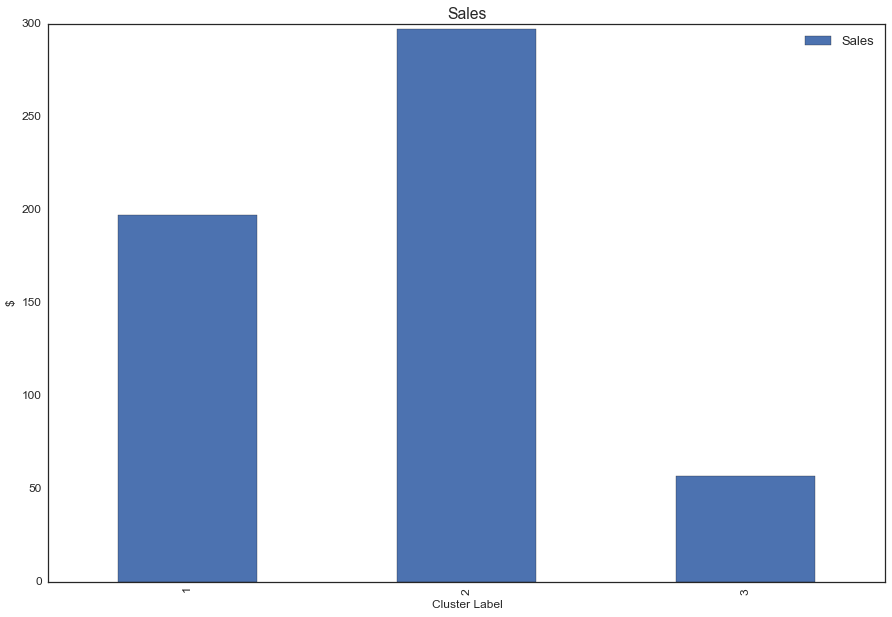

In [186]:
ax = clusteruno[['Sales']].plot(kind='bar', title ="Sales",figsize=(15,10),
                legend=True, fontsize=12)
ax.set_xlabel("Cluster Label",fontsize=12)
ax.set_ylabel("$",fontsize=12)
plt.show()

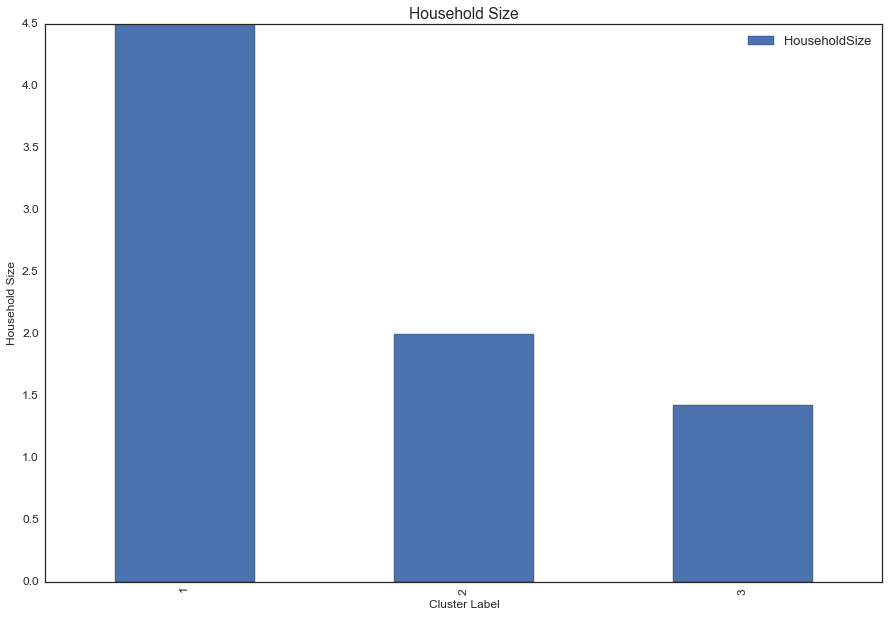

In [187]:
ax = clusteruno[['HouseholdSize']].plot(kind='bar', title ="Household Size",figsize=(15,10),
                legend=True, fontsize=12)
ax.set_xlabel("Cluster Label",fontsize=12)
ax.set_ylabel("Household Size",fontsize=12)
plt.show()

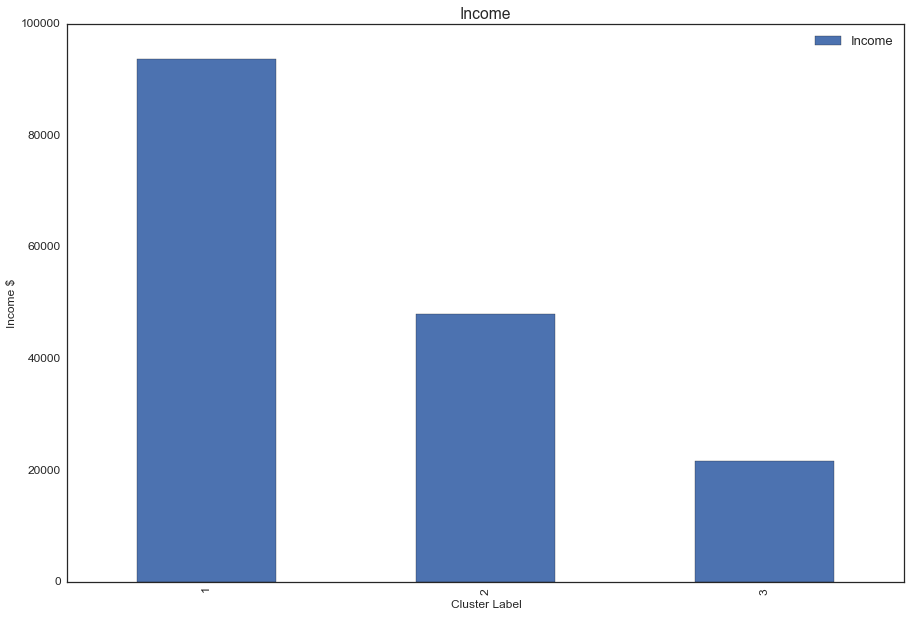

In [188]:
ax = clusteruno[['Income']].plot(kind='bar', title ="Income",figsize=(15,10),
                legend=True, fontsize=12)
ax.set_xlabel("Cluster Label",fontsize=12)
ax.set_ylabel("Income $",fontsize=12)
plt.show()

#### Textual Summary for Each Cluster of Customers

Cluster 1: Mean age of 33. They're all women with huge income around $90,000. They have the second highest sales and buy mostly wine. They buy some spirits, but no beer. Pay primarily with credit.

Cluster 2: Mean age of 66. All male. About $50,000 income, with the highest sales numbers. They buy 75% spirits, %25 wine, and no beer. Pay primarily with cash.

Cluster 3: Mean age of 22. Mean income of $22,000. Lowest sales numbers, but highest consumer of beer. Slightly more men than women in the group. Pay with a mix of cash and debit.

## b.)

The following recommendations are based on the raw data grouped by cluster, as shown in part a. Bar graphs vizualize this data and help point out trends and facts. Our data set is too small to garner many meaningful regression outputs. I tried, but in my opinion we need more data points. Therefore, most of these insights are based on mean statistics and intuitive patterns drawn from the vizualizations.

● Cluster 2 has the highest sales and vast consumption of spirits. In order to maximize profits, spirits and expensive drinks should be marketed towards cluster 2 which has a mean age of 66. They also use mostly cash, so they don't utilize electronic payment (ie credit card) as much. Market wine sales to cluster 1 which has mean age 33. Market beer to cluster 3, which is the youngest cluster with a mean age of 22. Younger people tend to pay in forms other than cash. Be prepared for this.

● Cluster 3 has majority males and the group makes a mean of 20 store visits. This is the most of any cluster. Their sales are also the lowest of the groups. You probably want to frequently restock beer and market cheap prices in order to keep young people coming back to the store. It sounds like they make up their sales in volume of orders, as opposed to the other two clusters which buy wine or spirits, which tend to be more expensive.

# #3

## a.)

● Euclidean distance - Good for: quantitative data, equal importance/weights, normalized data.

● Manhattan (city block) distance - This method is preferred when you can map the data out in a way that resembles city blocks or a chess board. This technique isn't as common as the others because it can be complicated to apply when the data doesn't naturally fit to the city-block formula.

● Jaccard distance - When are data is nominal (true/false, words, etc.)

● Cosine distance - Especially useful for text mining. 

## b.)

● Rule of Thumb - 

Pro: k= sqrt(n/2) It's easy to run and set up quickly.
                  
Con: Not as powerful as the other tests of evaluation.

● Elbow Method - 

Pro: Elbow/sharp bend shows point at which adding more clusters helps reduce distortion measure less
                      and less
                                       
Con: Longer code to execute and the user still has to interpret the optimal bend in order to determine                       k

● Information Criterion Approach - 

Pro: Robust test for finding k. The plot circles the bend, making it easy to locate.
                                   
Con: Trickier to read than other methods. Can give varying k values. For example, in this homework the it gives k = 4.
